In [42]:
import numpy as np
import pandas as pd

In [43]:
# converts a raw data file, test flag takes a small subset of the first file (the first threshold rows)
def convertToJson(inputFile, outputFile, test=False, threshold=1000):
    
    # read lines into memory
    with open(inputFile, 'r') as inFile:
        count = 0
        lines = []
        for line in inFile:
            lines.append(line)
            count +=1
            if count > threshold and test:
                break
        print(count)

    # write lines out to json file, last line needs to not have comma otherwise pandas throws error
    with open(outputFile, 'w') as outFile:
        outFile.write('[\n')
        k = len(lines)
        for i, line in enumerate(lines[:-1]):
            res = line.replace('}','},')
            outFile.write(res)
        outFile.write(lines[-1])
        outFile.write(']\n')


In [44]:
# creates a data frame given json file jsonData
def createDataFrame(jsonData):
    df = None
    with open(jsonData,'r') as data:
        df = pd.read_json(data)
    return df


In [45]:
fileName1 = 'rio_bq_2019000000000000'
outputFileName1 = fileName1+'.json'
df1 = convertToJson(fileName1, outputFileName1, test=True, threshold=10000)
                
fileName2 = 'rio_bq_2019000000000001'
outputFileName2 = fileName2+'.json'
df2 = convertToJson(fileName2, outputFileName2, test=True, threshold=10000)
                
df1 = createDataFrame(outputFileName1)
df2 = createDataFrame(outputFileName2)

frames = [df1, df2]
df = pd.concat(frames, ignore_index=True)

10001
10001


In [46]:
def convertDateTime(df):
    df['localtime'] = pd.to_datetime(df['localtime'])
    return df

In [47]:
df = convertDateTime(df)
df['localtime'][0].time()

datetime.time(2, 52, 33, 289000)

In [48]:

df81 = df[(df['localtime'] >= '2019-08-01') & (df['localtime'] < '2019-08-02')]

In [50]:
import matplotlib.pyplot as plt

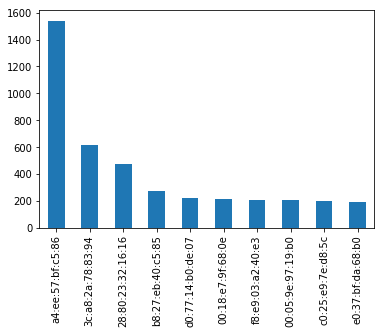

In [70]:
fig, ax = plt.subplots()
top100 = df['ClientMacAddr'].value_counts()[:10]
top100.plot.bar(ax=ax)

In [94]:
addrs = df['ClientMacAddr'].value_counts()[:10].to_dict()
addrList = []
for addr in addrs:
    addrList.append(addr)

c0:25:e9:7e:d8:5c


In [142]:
from datetime import timedelta

def knnGroupSoloClassifier(df, addrList,starTime , endTime):
    timeFrame = df[(df['localtime'] >= startTime) & (df['localtime'] < endTime)]
    macAddrLocation = dict()
    for addr in addrList:
        macAddrLocation = []
    
    for time in range(0, 100, 20):
        frameStartTime = startTime + timedelta(minutes=time)
        frameEndTime = frameStartTime + timedelta(minutes=5)
        frame = df[(df['localtime'] >= frameStartTime) & (df['localtime'] < frameEndTime)]
        for addr in macAddrLocation:
            records = frame.loc[frame['ClientMacAddr'] == addr]
            if records:
                macAddrLocation[addr] = records[0]
            else:
                macAddrLocation[addr] = None


    for addr in macAddrLocation:
        print(addr)
        print(macAddrLocation[addr])
        
import datetime
# knnGroupSoloClassifier(df, addrList)

startTime = datetime.datetime(2019,8,1,3,0,0,0, datetime.timezone.utc ) 
endTime = datetime.datetime(2019,8,1,5,0,0,0, datetime.timezone.utc)
knnGroupSoloClassifier(df, addrList, startTime, endTime)


Empty DataFrame
Columns: [Building, ClientMacAddr, Level, lat, lng, localtime]
Index: []
    Building      ClientMacAddr    Level        lat        lng  \
244     TPS1  3c:a8:2a:78:b4:94  Level 2 -22.812095 -43.250178   
245     TPS1  3c:a8:2a:78:b4:94  Level 2 -22.812095 -43.250178   
246     TPS1  84:10:0d:3c:cf:4c  Level 2 -22.812062 -43.251435   
247     TPS1  84:10:0d:3c:cf:4c  Level 2 -22.812062 -43.251435   
248     TPS1  38:80:df:33:78:f3  Level 2 -22.811882 -43.249165   

                           localtime  
244 2019-08-01 03:20:01.682000+00:00  
245 2019-08-01 03:20:01.682000+00:00  
246 2019-08-01 03:20:03.263000+00:00  
247 2019-08-01 03:20:03.263000+00:00  
248 2019-08-01 03:20:04.579000+00:00  
     Building      ClientMacAddr    Level        lat        lng  \
2110     TPS1  28:80:23:32:16:16  Level 2 -22.812084 -43.249817   
2111     TPS1  28:80:23:32:16:16  Level 2 -22.812084 -43.249817   
2112     TPS1  72:e9:66:e5:01:c2  Level 2 -22.812050 -43.250092   
2113     TPS